# # AMIT ANAND. 220968430. DSE B.

## WEEK3: EX2: BOLLYWOOD

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import calendar
df=pd.read_csv("C:\\Users\\AMIT ANAND\\OneDrive\\Desktop\\bollywood.csv")

1. How many records are present in the dataset? 


In [2]:
len(df)

149

2. How many movies got released in each genre? Sort number of releases in each genre
in descending order


In [3]:
df['Genre']=df['Genre'].str.strip()
df['Genre'].value_counts().sort_values(ascending=False)

Comedy      36
Drama       35
Thriller    29
Romance     25
Action      24
Name: Genre, dtype: int64

3. Which genre had highest number of releases? 


In [4]:
df['Genre'].value_counts().sort_values(ascending=False).idxmax()

'Comedy'

4. How many movies in each genre got released in different release times like long
weekend, festive season, etc. (Note: Do a cross tabulation between Genre and
ReleaseTime.) 


In [5]:
pd.crosstab(df['Genre'], df['ReleaseTime'])

ReleaseTime,FS,HS,LW,N
Genre,,,,
Action,3,3,3,15
Comedy,3,5,5,23
Drama,4,6,1,24
Romance,3,3,4,15
Thriller,4,1,2,22


5. Which month of the year, maximum number movie releases are seen? (Note: Extract a
new column called month from ReleaseDate column.) 


In [6]:
df['Release Date'] = pd.to_datetime(df['Release Date'])
df['Month'] = df['Release Date'].dt.month
most_common_month=df['Month'].value_counts().idxmax()
calendar.month_name[most_common_month]

'January'

6. Which month of the year typically sees most releases of high budgeted movies, that is,
movies with budget of 25 crore or more? 


In [7]:
df[df['Budget'] >= 25]['Month'].value_counts().idxmax()

2

7. Which are the top 10 movies with maximum return on investment (ROI)? Calculate
return on investment (ROI) as (BoxOfficeCollection – Budget) / Budget.


In [8]:
df['ROI'] = (df['BoxOfficeCollection'] - df['Budget']) / df['Budget']
df.nlargest(10, 'ROI')['MovieName']

64                    Aashiqui 2
89                            PK
132                  Grand Masti
135                 The Lunchbox
87                        Fukrey
58                      Mary Kom
128                       Shahid
37     Humpty Sharma Ki Dulhania
101           Bhaag Milkha Bhaag
115              Chennai Express
Name: MovieName, dtype: object

8. Do the movies have higher ROI if they get released on festive seasons or long
weekend? Calculate the average ROI for different release times.

Ans: Festive Season

In [9]:
df.groupby('ReleaseTime')['ROI'].mean()

ReleaseTime
FS    0.973853
HS    0.850867
LW    1.127205
N     0.657722
Name: ROI, dtype: float64

9. Is there a correlation between box office collection and YouTube likes? Is the
correlation positive or negative? 


In [10]:
df['BoxOfficeCollection'].corr(df['YoutubeLikes'])

0.6825165877731297

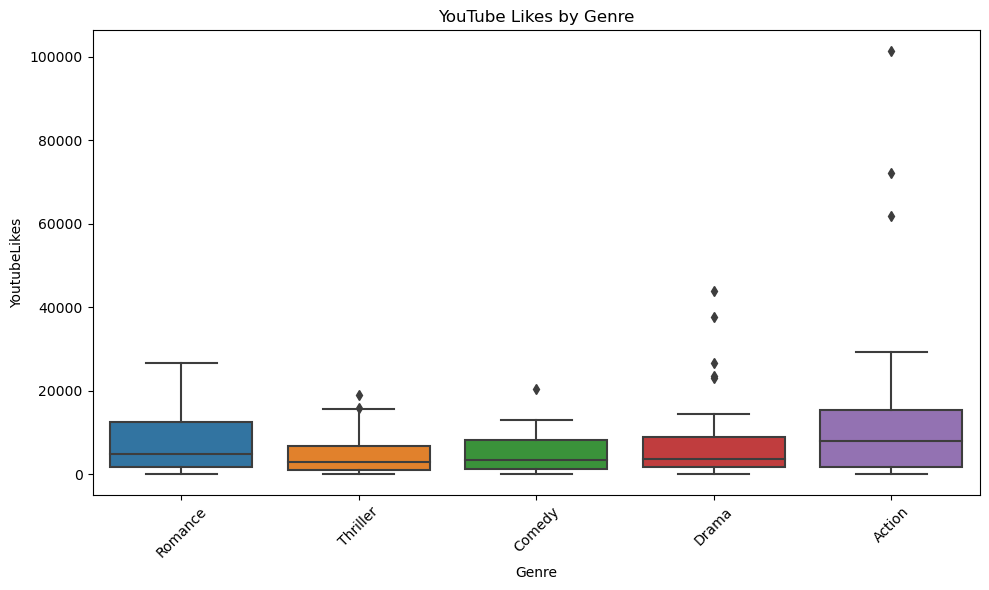

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Genre', y='YoutubeLikes')
plt.title("YouTube Likes by Genre")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


10. Which genre of movies typically sees more YouTube likes? Draw boxplots for each
genre of movies to compare. 


C:\Users\AMIT ANAND\AppData\Local\Temp\ipykernel_26436\1220919371.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


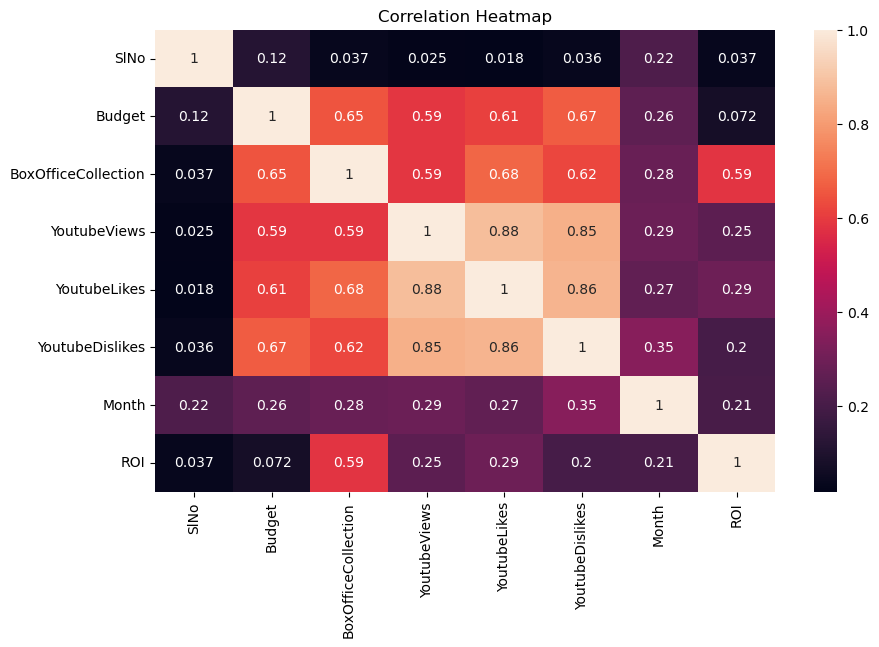

In [12]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True)
plt.title("Correlation Heatmap")
plt.show()

12. During 2013−2015 period, highlight the genre of movies and their box office
collection? Visualize with best fit graph. 

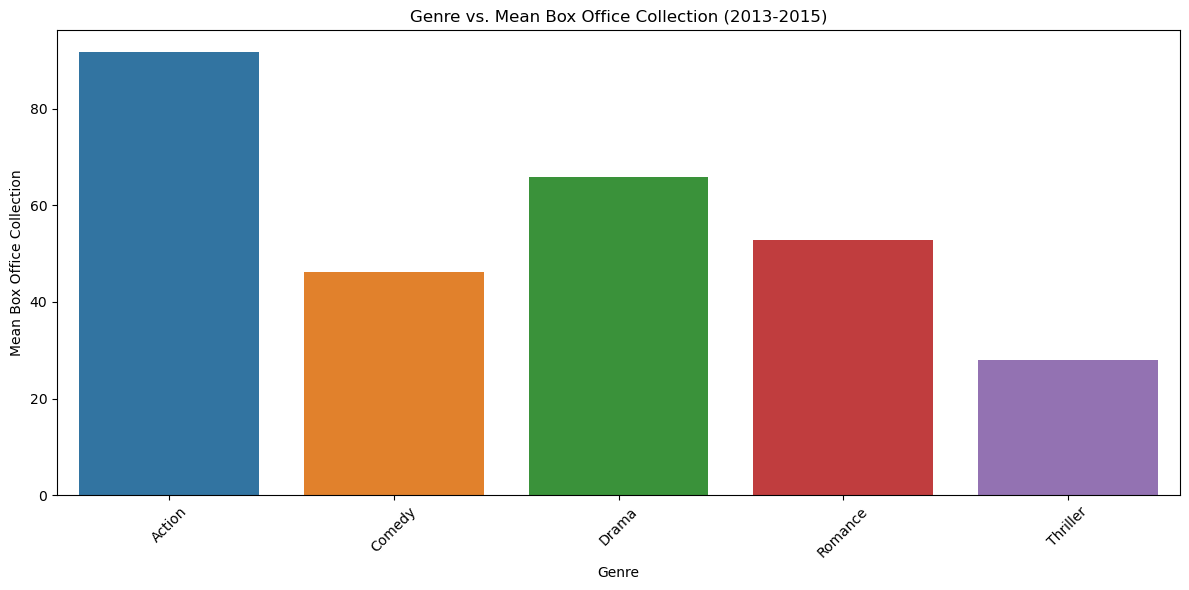

In [13]:
df_2013_2015 = df[(df['Release Date'] >= '2013-01-01') & (df['Release Date'] <= '2015-12-31')]
genre_box_office = df_2013_2015.groupby('Genre')['BoxOfficeCollection'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=genre_box_office, x='Genre', y='BoxOfficeCollection')
plt.title("Genre vs. Mean Box Office Collection (2013-2015)")
plt.xlabel("Genre")
plt.ylabel("Mean Box Office Collection")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

13. Visualize the Budget and Box office collection based on Genre. 

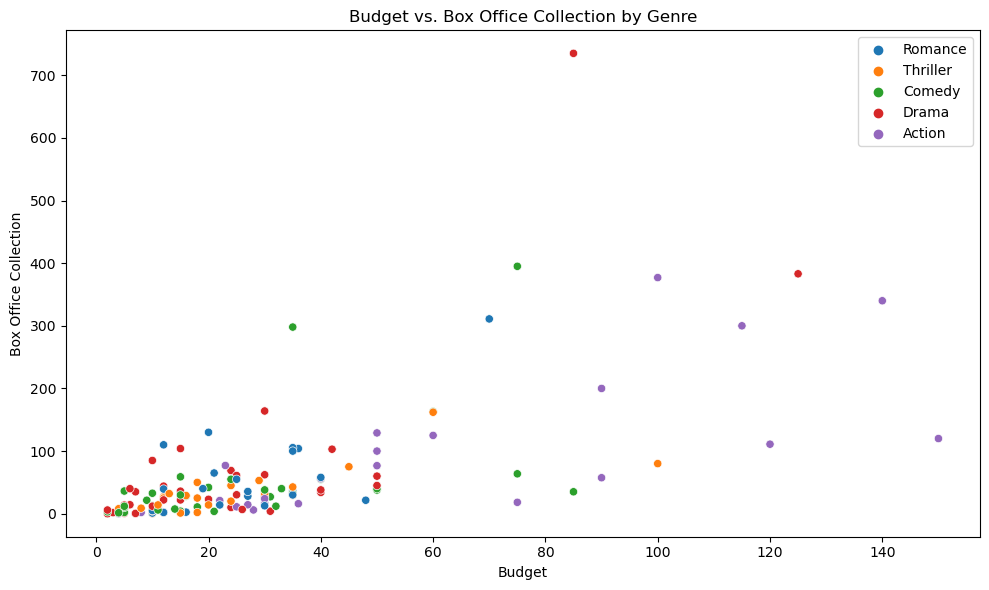

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Budget', y='BoxOfficeCollection', hue='Genre')
plt.title("Budget vs. Box Office Collection by Genre")
plt.xlabel("Budget")
plt.ylabel("Box Office Collection")
plt.legend()
plt.tight_layout()
plt.show()

14. Find the distribution of movie budget for every Genre. 

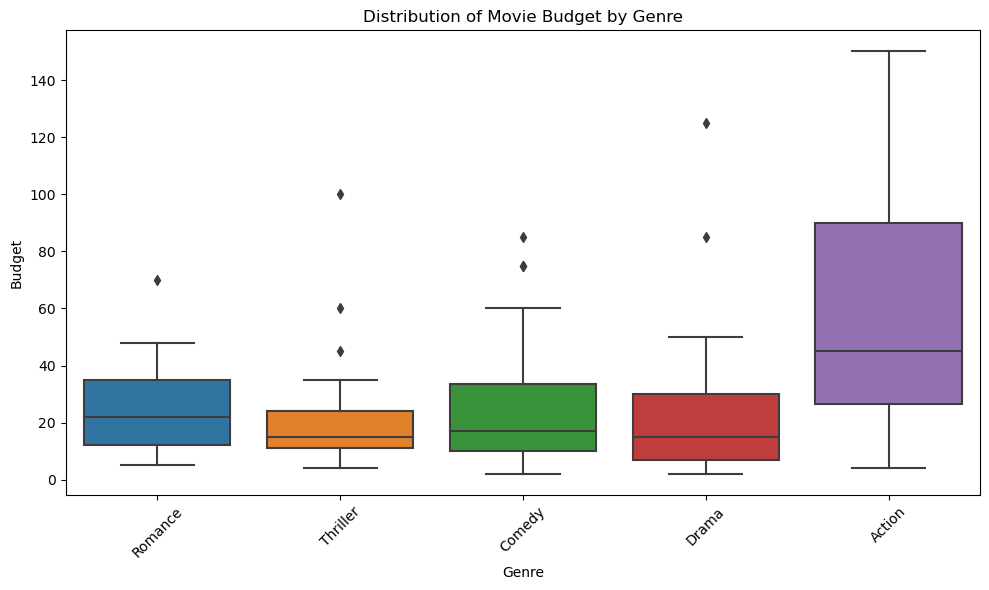

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Genre', y='Budget')
plt.title("Distribution of Movie Budget by Genre")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

15. During 2013−2015, find the number of movies released in every year. Also, visualize
with best fit graph

In [16]:
movies_per_year=df['Release Date'].dt.year.value_counts().sort_index()
movies_per_year

2013    67
2014    70
2015    12
Name: Release Date, dtype: int64

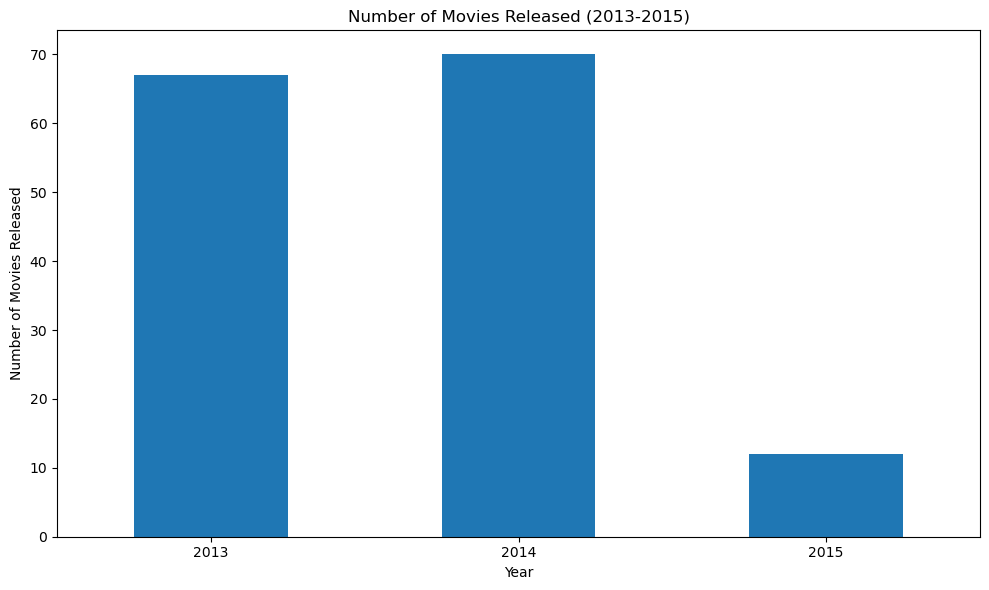

In [17]:
plt.figure(figsize=(10, 6))
movies_per_year.plot(kind='bar', rot=0)
plt.title("Number of Movies Released (2013-2015)")
plt.xlabel("Year")
plt.ylabel("Number of Movies Released")
plt.tight_layout()
plt.show()